In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "flatiorn", "project2", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [5]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [6]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

In [7]:
#  Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['waterfront', 'greenbelt', 'sewer_system', 'condition', 'grade', 'heat_source'])

In [8]:
#checking to see if dummie variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors nuisance     view  sqft_above  sqft_bas

In [9]:
# Display the column names in your DataFrame
print(df_cleaned.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'nuisance', 'view', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'waterfront_NO', 'waterfront_YES', 'greenbelt_NO',
       'greenbelt_YES', 'sewer_system_PRIVATE',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Othe

In [10]:
# List of columns to remove
columns_to_remove = ['address','lat', 'long','date', 'nuisance','view', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
4  8562780790  592500.0         2        2.0         1120       758     2.0   

   waterfront_NO  waterfront_YES  greenbelt_NO  greenbelt_YES  \
0              1               0             1              0   
1              1               0             1              0   
2              1               0             1              0   
3              1               0             1              0   
4              1               0             1              0   

   sewer_system_PRIVATE  sewer_system_PRIVATE RESTRICTED  sewer_system_PUBLIC  \
0                     0                              

In [11]:
# List of columns to remove
columns_to_remove = df_cleaned.columns[df_cleaned.columns.str.startswith('grade_')]

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())


           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
4  8562780790  592500.0         2        2.0         1120       758     2.0   

   waterfront_NO  waterfront_YES  greenbelt_NO  greenbelt_YES  \
0              1               0             1              0   
1              1               0             1              0   
2              1               0             1              0   
3              1               0             1              0   
4              1               0             1              0   

   sewer_system_PRIVATE  sewer_system_PRIVATE RESTRICTED  sewer_system_PUBLIC  \
0                     0                              

In [12]:
#Seperating the target variable price
housepricepreds = df_cleaned.drop('price', axis=1)
#target variable price
price_target = df_cleaned['price']
#Reviewing new rows of dataset 
housepricepreds.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_NO,waterfront_YES,greenbelt_NO,greenbelt_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other
0,7399300360,4,1.0,1180,7140,1.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,8910500230,5,2.5,2770,6703,1.0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1180000275,6,2.0,2880,6156,1.0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1604601802,3,3.0,2160,1400,2.0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,8562780790,2,2.0,1120,758,2.0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [13]:
#Removing variables that the homeowner cannot control
# List of columns to remove
columns_to_remove = df_cleaned.columns[df_cleaned.columns.str.startswith('waterfront_') | df_cleaned.columns.str.startswith('greenbelt')| df_cleaned.columns.str.startswith('sewer')]


# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())


           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
4  8562780790  592500.0         2        2.0         1120       758     2.0   

   condition_Average  condition_Fair  condition_Good  condition_Poor  \
0                  0               0               1               0   
1                  1               0               0               0   
2                  1               0               0               0   
3                  1               0               0               0   
4                  1               0               0               0   

   condition_Very Good  heat_source_Electricity  \
0                    0                   

In [14]:


# create predictors
predictors = df_cleaned.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df_cleaned['price'],predictors_int).fit()


In [15]:
# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df_cleaned['price'], predictors_int).fit()

# Get the coefficients
coeff = model.params

# Sort the coefficients for the bar chart
coeff_sorted = coeff.iloc[(coeff.abs()*-1.0).argsort()]

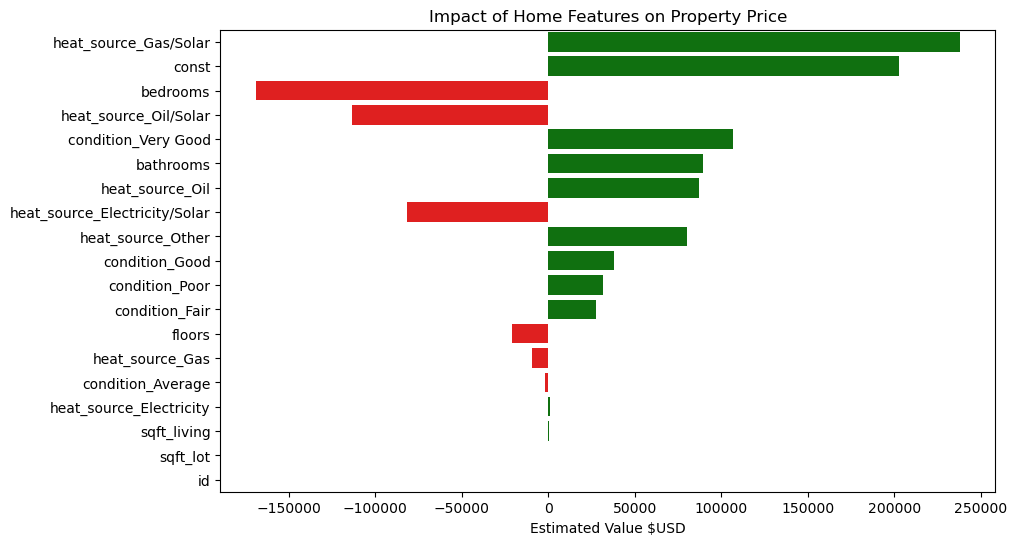

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

coeff_sorted = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_sorted.values, y=coeff_sorted.index, orient='h', palette=['green' if x > 0 else 'red' for x in coeff_sorted.values])

# Add labels and title
plt.xlabel('Estimated Value $USD')
plt.title('Impact of Home Features on Property Price')


plt.show()


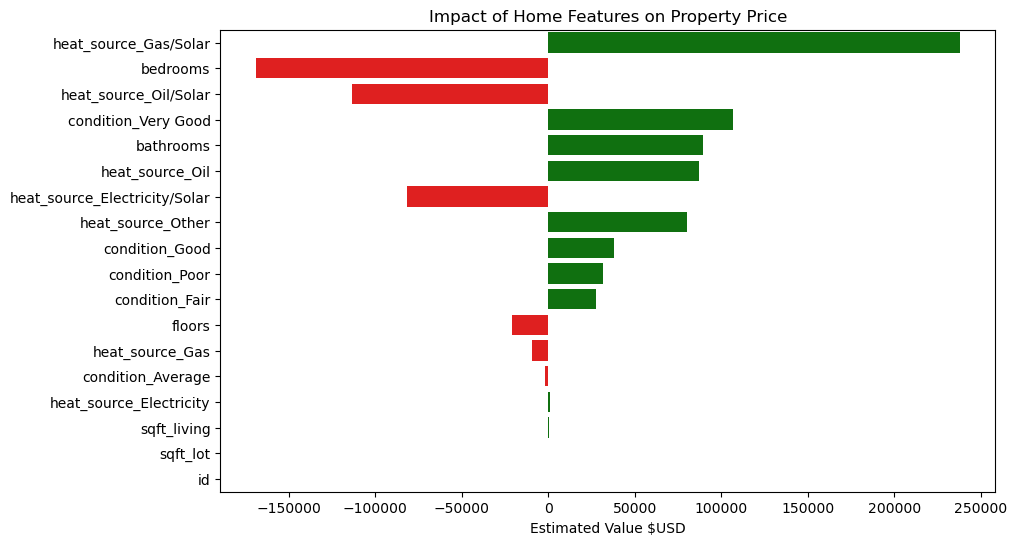

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'df_cleaned' is your DataFrame with the data
# Assuming 'predictors' is your DataFrame with predictor variables

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df_cleaned['price'], predictors_int).fit()

# Get the coefficients excluding the intercept
coeff = model.params[1:]

# Sort the coefficients for the bar chart
coeff_sorted = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_sorted.values, y=coeff_sorted.index, orient='h', palette=['green' if x > 0 else 'red' for x in coeff_sorted.values])

# Add labels and title
plt.xlabel('Estimated Value $USD')
plt.title('Impact of Home Features on Property Price')

plt.show()


In [24]:
# view model coefficients
coeff = model.params[1:]
print(coeff)

id                                   -0.000004
bedrooms                        -169069.205683
bathrooms                         89312.342324
sqft_living                         616.382161
sqft_lot                             -0.010877
floors                           -20646.021097
condition_Average                 -1707.372573
condition_Fair                    27471.194071
condition_Good                    38101.001639
condition_Poor                    31702.636965
condition_Very Good              106956.219412
heat_source_Electricity             947.120189
heat_source_Electricity/Solar    -81792.469364
heat_source_Gas                   -9384.711323
heat_source_Gas/Solar            238066.092320
heat_source_Oil                   87375.694260
heat_source_Oil/Solar           -113162.718785
heat_source_Other                 80474.672218
dtype: float64


In [26]:
# view results of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     1212.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:35:54   Log-Likelihood:            -4.4793e+05
No. Observations:               30110   AIC:                         8.959e+05
Df Residuals:                   30093   BIC:                         8.960e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2.025e+05   4.69e+04      4.315      0.000    1.11e+05    2.95e+05
id                            -4.218e-06   1.41e-06     -2.986      0.003   -6.99e-06   -1.45e-06
bedrooms                      -1.691e+05   5539.636    -30.520      0.000    -1.8e+05   -1.58e+05
bathrooms                      8.931e+04   7796.991     11.455      0.000     7.4e+04    1.05e+05
sqft_living                     616.3822      7.167     85.998      0.000     602.334     630.431
sqft_lot                         -0.0109      0.069     -0.157      0.875      -0.147       0.125
floors                        -2.065e+04   8319.063     -2.482      0.013    -3.7e+04   -4340.302
condition_Average             -1707.3726   2.04e+04     -0.084      0.933   -4.17e+04    3.83e+04
condition_Fair                 2.747e+04   4.26e+04      0.644      0.519   -5.61e+04    1.11e+05
condition_Good                  3.81e+04   2.06e+04      1.849      0.065   -2297.984    7.85e+04
condition_Poor                  3.17e+04   7.54e+04      0.421      0.674   -1.16e+05    1.79e+05
condition_Very Good             1.07e+05    2.2e+04      4.855      0.000    6.38e+04     1.5e+05
heat_source_Electricity         947.1202   5.18e+04      0.018      0.985   -1.01e+05    1.02e+05
heat_source_Electricity/Solar -8.179e+04   9.39e+04     -0.871      0.384   -2.66e+05    1.02e+05
heat_source_Gas               -9384.7113   5.15e+04     -0.182      0.855    -1.1e+05    9.16e+04
heat_source_Gas/Solar          2.381e+05    8.1e+04      2.939      0.003    7.93e+04    3.97e+05
heat_source_Oil                8.738e+04   5.25e+04      1.664      0.096   -1.55e+04     1.9e+05
heat_source_Oil/Solar         -1.132e+05   3.06e+05     -0.370      0.712   -7.13e+05    4.87e+05
heat_source_Other              8.047e+04   1.45e+05      0.557      0.578   -2.03e+05    3.64e+05
==============================================================================
Omnibus:                    43122.583   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46985590.136
Skew:                           8.090   Prob(JB):                         0.00
Kurtosis:                     195.845   Cond. No.                     6.72e+25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
# Assuming 'model' is your fitted linear regression model
significant_columns = model.pvalues[model.pvalues <= 0.05].index

# Exclude 'const' from significant columns (if it exists)
significant_columns = [col for col in significant_columns if col != 'const']

# Filter your DataFrame to keep only significant columns
df_significant = df_cleaned[significant_columns]

# Display the first few rows of the resulting DataFrame
print(df_significant.head())



           id  bedrooms  bathrooms  sqft_living  floors  condition_Very Good  \
0  7399300360         4        1.0         1180     1.0                    0   
1  8910500230         5        2.5         2770     1.0                    0   
2  1180000275         6        2.0         2880     1.0                    0   
3  1604601802         3        3.0         2160     2.0                    0   
4  8562780790         2        2.0         1120     2.0                    0   

   heat_source_Gas/Solar  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


In [31]:
import statsmodels.api as sm

# Assuming 'price' is your target variable
target_variable = df_cleaned['price']

# Create predictors using the new significant columns
# Make sure 'price' is included in the significant columns
predictors_significant = df_significant.drop('price', axis=1, errors='ignore')

# Add a constant term to the predictors
predictors_significant_int = sm.add_constant(predictors_significant)

# Fit the linear regression model
model_significant = sm.OLS(target_variable, predictors_significant_int).fit()

# Display the summary
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2756.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:42:11   Log-Likelihood:            -4.4796e+05
No. Observations:               30110   AIC:                         8.959e+05
Df Residuals:                   30102   BIC:                         8.960e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.537e+

In [32]:
# Display the summary for the new model with additional information
model_significant.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2756.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:44:37   Log-Likelihood:            -4.4796e+05
No. Observations:               30110   AIC:                         8.959e+05
Df Residuals:                   30102   BIC:                         8.960e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.537e+05   1.86e+04     13.603      0.000    2.17e+05     2.9e+05
id                    -4.462e-06    1.4e-06     -3.184      0.001   -7.21e-06   -1.71e-06
bedrooms              -1.669e+05   5495.445    -30.378      0.000   -1.78e+05   -1.56e+05
bathrooms              7.895e+04   7648.993     10.321      0.000     6.4e+04    9.39e+04
sqft_living             618.3163      6.993     88.424      0.000     604.610     632.022
floors                -3.605e+04   7950.855     -4.534      0.000   -5.16e+04   -2.05e+04
condition_Very Good    8.753e+04   1.32e+04      6.630      0.000    6.16e+04    1.13e+05
heat_source_Gas/Solar  2.411e+05   7.28e+04      3.315      0.001    9.85e+04    3.84e+05
==============================================================================
Omnibus:                    43101.273   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46724187.643
Skew:                           8.084   Prob(JB):                         0.00
Kurtosis:                     195.305   Cond. No.                     9.70e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.7e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""